<a href="https://colab.research.google.com/github/ingtwo/vehicle_prediction_panne_ml/blob/main/Capteurs_Donnees_reelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module to list directory contents

# url du dataset avec les infos
# https://www.kaggle.com/datasets/datasetengineer/eviot-predictivemaint-dataset/data?select=EV_Predictive_Maintenance_Dataset_15min.csv

# INFOS SUR LES COLONNES PRINCIPALES (il y a 30 colonnes)
# 1) Battery System Monitoring
# SoC (State of Charge) – Battery charge percentage
# SoH (State of Health) – Battery degradation level
# Battery Voltage – Voltage levels across the battery pack
# Battery Current – Current drawn or supplied by the battery
# Battery Temperature – Temperature of battery cells
# Charge Cycles – Total charge-discharge cycles of the battery

# 2) Electric Motor and Drivetrain Monitoring
# Motor Temperature – Temperature of the electric motor
# Motor Vibration – Vibration levels indicating wear or imbalance
# Motor Torque – Torque generated by the motor
# Motor RPM – Revolutions per minute of the motor
# Power Consumption – Power usage by the drivetrain system

# 3) Brake System Monitoring
# Brake Pad Wear – Thickness level of brake pads
# Brake Pressure – Hydraulic pressure applied to the braking system
# Regenerative Braking Efficiency – Efficiency of energy recovery during braking

# 4) Tire and Suspension Data
# Tire Pressure – Air pressure within the tires
# Tire Temperature – Surface temperature of the tires
# Suspension Load – Load stress on the suspension system

# 5) Environmental and Usage Data
# Ambient Temperature – External temperature conditions
# Ambient Humidity – Humidity levels in the surrounding environment
# Load Weight – Cargo or passenger weight carried by the vehicle
# Driving Speed – Current vehicle speed

# 6) Telematics and Fleet Data
# Distance Traveled – Cumulative distance covered
# Idle Time – Duration of vehicle idling
# Route Roughness – Road surface condition affecting vehicle wear

# 7) Maintenance Records
# Maintenance Type – Categories: None (0), Preventive (1), Corrective (2), Predictive (3)

# 8) Target Labels for Predictive Maintenance
# Remaining Useful Life (RUL) – Estimated time before maintenance is required
# Failure Probability – Likelihood of system failure (0: No Failure, 1: Failure)
# Time to Failure (TTF) – Estimated time before the next failure event
# Component Health Score – A continuous score (0-1) indicating component condition



# Download latest version
path = kagglehub.dataset_download("datasetengineer/eviot-predictivemaint-dataset")

print("Path to dataset files:", path)

# List files in the downloaded directory
files = os.listdir(path)
print("Files in the directory:", files)

# Construct the full path to the CSV file using the correct filename from the output
csv_file_path = os.path.join(path, 'EV_Predictive_Maintenance_Dataset_15min.csv')

# read file
df = pd.read_csv(csv_file_path, index_col='Timestamp', parse_dates=True)
df.head()

#Compter le nombre de 1 dans la colonne Failure_Probability*
print(df['Failure_Probability'].value_counts())








Path to dataset files: /kaggle/input/eviot-predictivemaint-dataset
Files in the directory: ['EV_Predictive_Maintenance_Dataset_15min.csv']
Failure_Probability
0    158061
1     17332
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175393 entries, 2020-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SoC                     175393 non-null  float64
 1   SoH                     175393 non-null  float64
 2   Battery_Voltage         175393 non-null  float64
 3   Battery_Current         175393 non-null  float64
 4   Battery_Temperature     175393 non-null  float64
 5   Charge_Cycles           175393 non-null  float64
 6   Motor_Temperature       175393 non-null  float64
 7   Motor_Vibration         175393 non-null  float64
 8   Motor_Torque            175393 non-null  float64
 9   Motor_RPM               175393 non-null  float64
 10  Power_Consumption       175393 non-null  float64
 11  Brake_Pad_Wear          175393 non-null  float64
 12  Brake_Pressure          175393 non-null  float64
 13  Reg_Brake_Efficiency    175393 non-null 

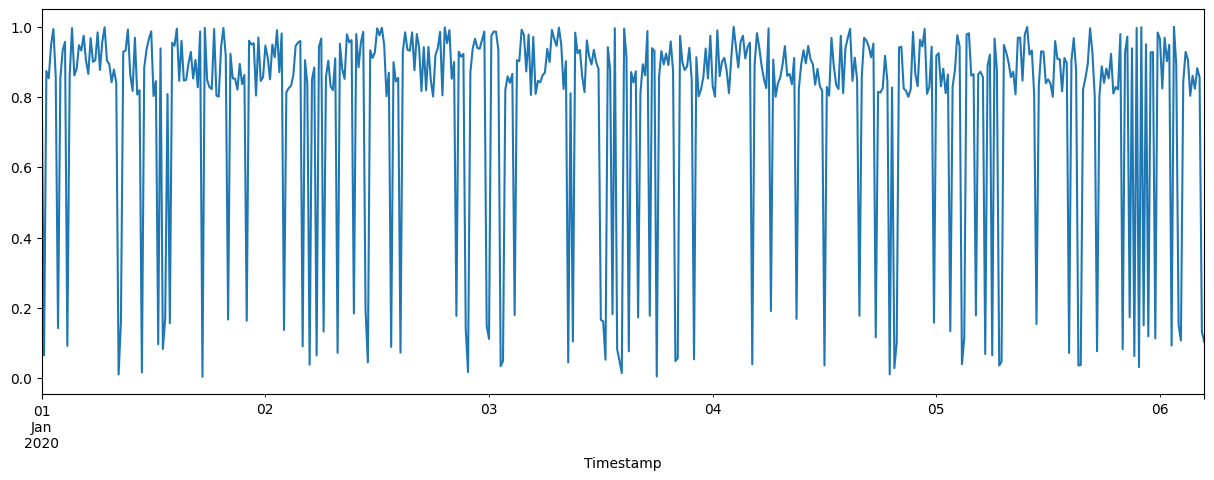

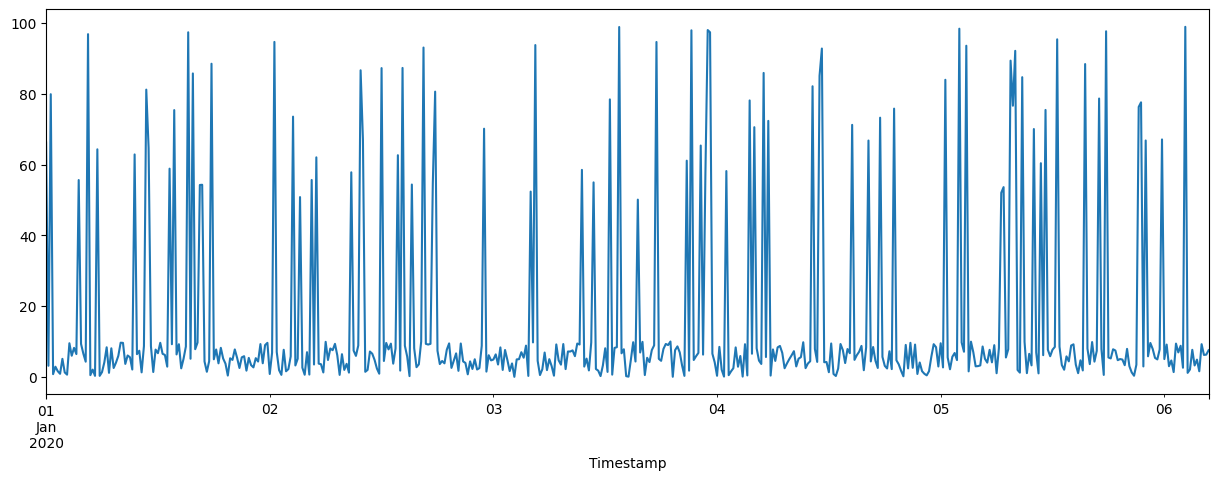

In [ ]:
# 1) EDA
df.info()
df.describe()
df['SoC'][0:500].plot(figsize=(15,5))
plt.show()
df['Distance_Traveled'][0:500].plot(figsize=(15,5))
plt.show()


In [ ]:
# la colonne est bien interprété comme une date par pandas
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:15:00',
               '2020-01-01 00:30:00', '2020-01-01 00:45:00',
               '2020-01-01 01:00:00', '2020-01-01 01:15:00',
               '2020-01-01 01:30:00', '2020-01-01 01:45:00',
               '2020-01-01 02:00:00', '2020-01-01 02:15:00',
               ...
               '2024-12-31 21:45:00', '2024-12-31 22:00:00',
               '2024-12-31 22:15:00', '2024-12-31 22:30:00',
               '2024-12-31 22:45:00', '2024-12-31 23:00:00',
               '2024-12-31 23:15:00', '2024-12-31 23:30:00',
               '2024-12-31 23:45:00', '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=175393, freq=None)

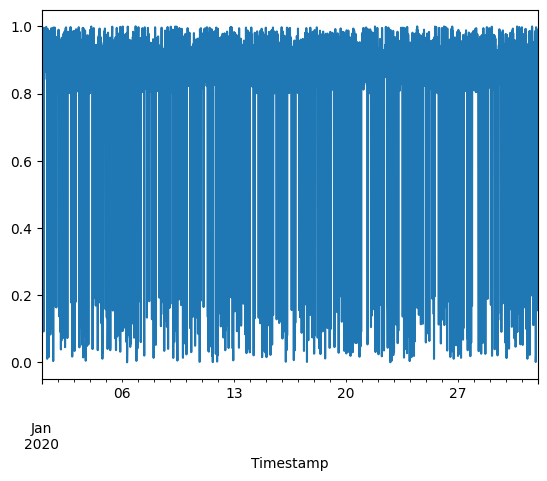

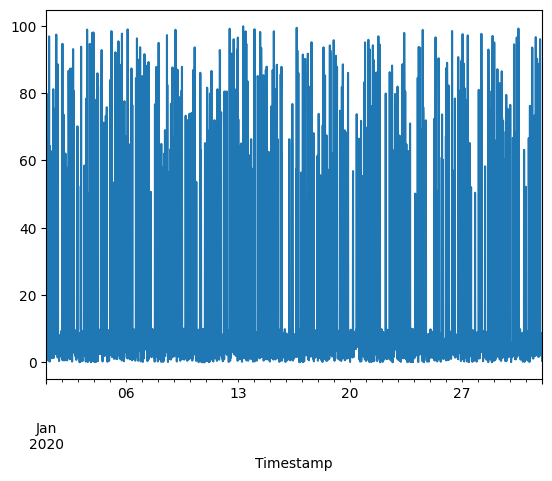

In [ ]:
# on affiche que janvier 2020
df.loc['2020-01']['SoC'].plot()
plt.show()
df.loc['2020-01']['Distance_Traveled'].plot()
plt.show()

In [ ]:
# Nettoyage des données

print(df.isnull().sum())
df.dropna()
df.drop_duplicates()
# il n' y a pas de valeurs manquantes ici

df.dtypes # voir le type des colonnes

SoC                       0
SoH                       0
Battery_Voltage           0
Battery_Current           0
Battery_Temperature       0
Charge_Cycles             0
Motor_Temperature         0
Motor_Vibration           0
Motor_Torque              0
Motor_RPM                 0
Power_Consumption         0
Brake_Pad_Wear            0
Brake_Pressure            0
Reg_Brake_Efficiency      0
Tire_Pressure             0
Tire_Temperature          0
Suspension_Load           0
Ambient_Temperature       0
Ambient_Humidity          0
Load_Weight               0
Driving_Speed             0
Distance_Traveled         0
Idle_Time                 0
Route_Roughness           0
RUL                       0
Failure_Probability       0
Maintenance_Type          0
TTF                       0
Component_Health_Score    0
dtype: int64


,0
SoC,float64
SoH,float64
Battery_Voltage,float64
Battery_Current,float64
Battery_Temperature,float64
Charge_Cycles,float64
Motor_Temperature,float64
Motor_Vibration,float64
Motor_Torque,float64
Motor_RPM,float64


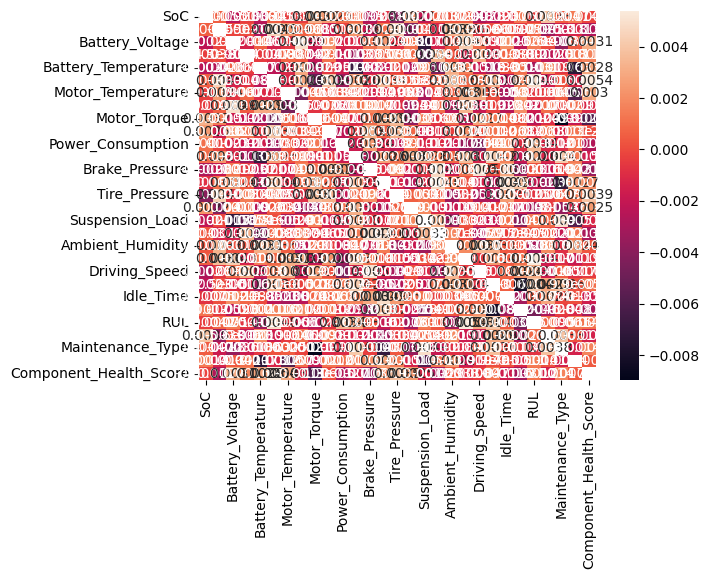

In [ ]:
# LES COLONNES TARGET :

# Target Labels for Predictive Maintenance
# Remaining Useful Life (RUL) – Estimated time before maintenance is required
# Failure Probability – Likelihood of system failure (0: No Failure, 1: Failure)
# Time to Failure (TTF) – Estimated time before the next failure event
# Component Health Score – A continuous score (0-1) indicating component condition


# Afficher la correlation entre les colonnes
df.corr()
# Afficher la matrice de correlation
#sns.heatmap(df.corr())


# Afficher la matrice de correlation sans la diagonale (car valeur trop faible et diagonale = 1 trop fort)
mask = np.eye(df.corr().shape[0], dtype=bool)
sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()


In [ ]:
# afficher les correlations les plus fortes sur les colonnes target
correlation_1 = df.corr()['Failure_Probability'].sort_values(ascending=False)
print('CORRELATION AVEC FAILURE_PROBABILITY : \n', correlation_1)
correlation_2 = df.corr()['RUL'].sort_values(ascending=False)
print('CORRELATION AVEC RUL : \n', correlation_2)
correlation_3 = df.corr()['TTF'].sort_values(ascending=False)
print('CORRELATION AVEC TTF : \n',correlation_3)
correlation_4 = df.corr()['Component_Health_Score'].sort_values(ascending=False)
print('CORRELATION AVEC COMPONENT HEALTH SCORE : \n', correlation_4)

CORRELATION AVEC FAILURE_PROBABILITY : 
 Failure_Probability       1.000000
SoC                       0.003815
Maintenance_Type          0.003806
Distance_Traveled         0.002870
Idle_Time                 0.002842
Ambient_Humidity          0.001904
Battery_Temperature       0.001866
Motor_RPM                 0.001136
Motor_Vibration           0.001009
RUL                       0.000955
Suspension_Load           0.000894
Ambient_Temperature       0.000212
TTF                       0.000159
Battery_Voltage          -0.000006
Motor_Temperature        -0.000461
Tire_Pressure            -0.000473
Tire_Temperature         -0.000539
Motor_Torque             -0.000983
Power_Consumption        -0.001213
Brake_Pad_Wear           -0.001259
Component_Health_Score   -0.001416
Driving_Speed            -0.001622
Charge_Cycles            -0.001631
Load_Weight              -0.001677
Brake_Pressure           -0.001904
Battery_Current          -0.002262
Route_Roughness          -0.002832
Reg_Brake_Effi

In [ ]:
# CORRELATION LA PLUS FORTE AVEC FAILURE_PROBABILITY : SoC, et la moins forte : SoH
# CORRELATION LA PLUS FORTE AVEC RUL : Load_Weight et la moins forte : Route_Roughness
# CORRELATION AVEC COMPONENT HEALTH SCORE :Charge_Cycles et la moins forte : Motor_Torque

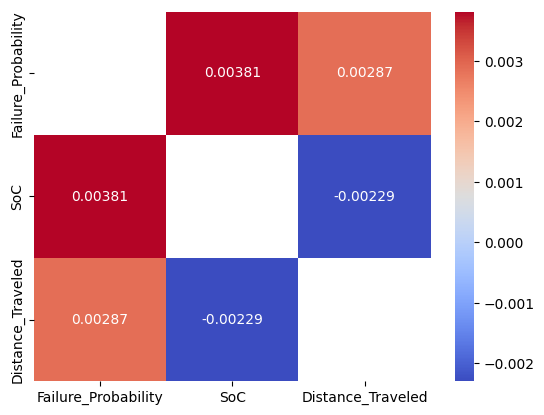

In [ ]:
# on prends la cible "Failure_Probability"

# Afficher la matrice de correlation sans la diagonale et les colonnes avec une forte correlation
# Selectionner les colonnes souhaitées
cols = ['Failure_Probability','SoC', 'Distance_Traveled']
corr = df[cols].corr()
# Masquer la diagonale
mask = np.eye(corr.shape[0], dtype=bool)
#Afficher la heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".5f", cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
# Encoder les variables catégorielles (Failure_Probability)
pd.get_dummies(df['Failure_Probability'])



,0,1
Timestamp,,
2020-01-01 00:00:00,True,False
2020-01-01 00:15:00,True,False
2020-01-01 00:30:00,True,False
2020-01-01 00:45:00,True,False
2020-01-01 01:00:00,False,True
...,...,...
2024-12-31 23:00:00,True,False
2024-12-31 23:15:00,True,False
2024-12-31 23:30:00,True,False


In [ ]:
# Normaliser les données (importaiient pour KNN, SVM, neuronnes)
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les données entre -1 et 1 (moyenne = 0) pour l'efficacité des modèles
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('Failure_Probability', axis=1))

# Definir la variable cible
x = df_normalized
y = df['Failure_Probability']

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choix du modèle pour la maintenance predictive
# Faire tourner plusieurs modèles (RandomForest, SVM et LogisticRegression)
#pour choisir le meilleur modèle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Failure_Probability', axis=1))
y = df['Failure_Probability']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à tester
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(C=1, kernel='rbf'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Entraînement et évaluation
for name, model in models.items():
    print(f"\n🔍 Entraînement du modèle : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"🎯 Accuracy : {acc:.4f}")
    print("📊 Classification Report :")
    print(classification_report(y_test, y_pred))
    print("🧮 Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))



In [ ]:
# Normaliser les données (importaiient pour KNN, SVM, neuronnes)
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les données entre -1 et 1 (moyenne = 0) pour l'efficacité des modèles
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('Failure_Probability', axis=1))

# Definir la variable cible
x = df_normalized
y = df['Failure_Probability']

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choix du modèle pour la maintenance predictive
# Faire tourner plusieurs modèles (RandomForest, SVM et LogisticRegression)
#pour choisir le meilleur modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

models = {
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear"]
        }
    }
}


# 3. Boucle sur les modèles
best_models = {}
for name, mp in models.items():
    print(f"🔍 Optimisation pour {name}...")
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', verbose = 2)
    print("paramètres:", mp["params"])
    clf.fit(X_train, y_train)
    best_models[name] = clf
    print(f"✅ Meilleur score: {clf.best_score_:.4f}")
    print(f"📌 Meilleurs paramètres: {clf.best_params_}\n")

# 4. Évaluation sur le test set
print("📊 Évaluation finale sur le test set :")
for name, clf in best_models.items():
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")




🔍 Optimisation pour RandomForest...
paramètres: {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................max_depth=None, n_estimators=50; total time= 2.3min
[CV] END ....................max_depth=None, n_estimators=50; total time= 2.2min
[CV] END ....................max_depth=None, n_estimators=50; total time= 2.2min
[CV] END ....................max_depth=None, n_estimators=50; total time= 2.2min
[CV] END ....................max_depth=None, n_estimators=50; total time= 2.2min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.5min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.5min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.2min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.5min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.4min
[CV] END ................

In [ ]:
# Normaliser les données (importaiient pour KNN, SVM, neuronnes)
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les données entre -1 et 1 (moyenne = 0) pour l'efficacité des modèles
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('Failure_Probability', axis=1))

# Definir la variable cible
x = df_normalized
y = df['Failure_Probability']

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choix du modèle pour la maintenance predictive
# Faire tourner plusieurs modèles (RandomForest, SVM et LogisticRegression)
#pour choisir le meilleur modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# RANDOM FOREST _______________________________________________________

# Paramètres à tester
n_estimators_list = [50, 100]
max_depth_list = [None, 10, 20]

from sklearn.ensemble import RandomForestClassifier

# Paramètres à tester
n_estimators_list = [50, 100]
max_depth_list = [None, 10, 20]

# Variables pour suivre la meilleure combinaison
best_accuracy = 0
best_params = {}

# Boucle sur les combinaisons de paramètres
for n in n_estimators_list:
    for depth in max_depth_list:
        print(f"Entrainement du modèle pour n_estimators={n}, max_depth={depth}")
        RF_Model = RandomForestClassifier(n_estimators=n, max_depth=depth)
        RF_Model.fit(X_train, y_train)

        # Évaluation du modèle
        accuracy = RF_Model.score(X_test, y_test)
        print(f"Accuracy: {accuracy:.4f}")

        # Mise à jour si meilleure précision trouvée
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"n_estimators": n, "max_depth": depth}

# Affichage de la meilleure combinaison
print("\n✅ Meilleure combinaison de paramètres :")
print(f"n_estimators = {best_params['n_estimators']}, max_depth = {best_params['max_depth']}")
print(f"🎯 Meilleure précision : {best_accuracy:.4f}")


Entrainement du modèle pour n_estimators=50, max_depth=None
Accuracy: 0.8998
Entrainement du modèle pour n_estimators=50, max_depth=10
Accuracy: 0.8998
Entrainement du modèle pour n_estimators=50, max_depth=20


In [ ]:
# Normaliser les données (importaiient pour KNN, SVM, neuronnes)
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les données entre -1 et 1 (moyenne = 0) pour l'efficacité des modèles
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('Failure_Probability', axis=1))

# Definir la variable cible
x = df_normalized
y = df['Failure_Probability']

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choix du modèle pour la maintenance predictive
# Faire tourner plusieurs modèles (RandomForest, SVM et LogisticRegression)
#pour choisir le meilleur modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# SVM _______________________________________________________
from sklearn.svm import SVC

# Paramètres à tester
C_values = [0.1, 1, 10]
kernels = ['linear', 'rbf', 'poly']

# Initialisation des meilleures valeurs
best_accuracy = 0
best_params = {}

# Meilleurs paramètre avecGridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("✅ Meilleurs paramètres trouvés :", grid_search.best_params_)
print(f"🎯 Meilleure précision : {grid_search.best_score_:.4f}")

# Affichage de la meilleure combinaison
print("\n✅ Meilleure combinaison de paramètres :")
print(f"C = {best_params['C']}, kernel = {best_params['kernel']}")
print(f"🎯 Meilleure précision : {best_accuracy:.4f}")


Entrainement du modèle SVC avec C=0.1, kernel=linear
Accuracy: 0.8998
Entrainement du modèle SVC avec C=0.1, kernel=rbf


In [ ]:
# Normaliser les données (importaiient pour KNN, SVM, neuronnes)
from sklearn.preprocessing import StandardScaler

# Normaliser toutes les données entre -1 et 1 (moyenne = 0) pour l'efficacité des modèles
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('Failure_Probability', axis=1))

# Definir la variable cible
x = df_normalized
y = df['Failure_Probability']

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choix du modèle pour la maintenance predictive
# Faire tourner plusieurs modèles (RandomForest, SVM et LogisticRegression)
#pour choisir le meilleur modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Regression Logistic _______________________________________________________

# Paramètres à tester
C_values = [0.1, 1, 10]
solvers = ['liblinear']

# Initialisation des meilleures valeurs
best_accuracy = 0
best_params = {}

# Boucle sur les combinaisons
for c in C_values:
    for solver in solvers:
        print(f"Entrainement du modèle Regression logistic avec C={c}, solver = {solver}")
        LR_model = LogisticRegression(C=c, solver=solver)
        LR_model.fit(X_train, y_train)
        accuracy = LR_model.score(X_test, y_test)
        print(f"Accuracy: {accuracy:.4f}")

        # Mise à jour si meilleure précision trouvée
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"C": c, "solver": solver}

# Affichage de la meilleure combinaison
print("\n✅ Meilleure combinaison de paramètres :")
print(f"C = {best_params['C']}, solver = {best_params['solver']}")
print(f"🎯 Meilleure précision : {best_accuracy:.4f}")

Entrainement du modèle Regression logistic avec C=0.1, solver = liblinear
Accuracy: 0.8998
Entrainement du modèle Regression logistic avec C=1, solver = liblinear
Accuracy: 0.8998
Entrainement du modèle Regression logistic avec C=10, solver = liblinear
Accuracy: 0.8998

✅ Meilleure combinaison de paramètres :
C = 0.1, solver = liblinear
🎯 Meilleure précision : 0.8998
